# **Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

#set warning 
import warnings
warnings.filterwarnings('ignore')


pd.pandas.set_option('display.max_columns', None)

In [2]:
filename = "D:/New folder/Sentiment-Analysis-Hotel-Review-main/Sentiment-Analysis-Hotel-Review-main/dasetEmotion2.csv"
df = pd.read_csv(filename, encoding = 'latin-1')
df.head()

,Unnamed: 0,Emotion,Text
0,1,senang,Pelayanannya sangat memuaskan.
1,2,puas,Proses administrasinya cepat dan mudah.
2,3,biasa saja,Tidak ada yang istimewa dari pelayanannya.
3,4,kesal,Pelayanannya sangat lambat dan tidak responsif.
4,5,kecewa,Kualitas layanan menurun drastis.


In [3]:
df.drop(columns = ['Unnamed: 0'], inplace = True)
df.columns = ['Emotion', 'Text']
df.head()

,Emotion,Text
0,senang,Pelayanannya sangat memuaskan.
1,puas,Proses administrasinya cepat dan mudah.
2,biasa saja,Tidak ada yang istimewa dari pelayanannya.
3,kesal,Pelayanannya sangat lambat dan tidak responsif.
4,kecewa,Kualitas layanan menurun drastis.


# **Preprocessing Data**


<h2>Cleaning the text</h2>

In [4]:
import string
import re

In [5]:
def clean_text(text):
    return re.sub('[^a-zA-Z]', ' ', text).lower()
df['cleaned_text'] = df['Text'].apply(lambda x: clean_text(x))
df['label'] = df['Emotion'].map({'kesal':0, 'sedih':0, 'kecewa':0, 'biasa saja':1, 'senang':1, 'puas':1})

<h2>Adding additional features - length of, and percentage of punctuations in the text</h2>

In [6]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100
df['Review_len'] = df['Text'].apply(lambda x: len(x) - x.count(" "))
df['punct'] = df['Emotion'].apply(lambda x: count_punct(x))
df.head()

,Emotion,Text,cleaned_text,label,Review_len,punct
0,senang,Pelayanannya sangat memuaskan.,pelayanannya sangat memuaskan,1,28,0.0
1,puas,Proses administrasinya cepat dan mudah.,proses administrasinya cepat dan mudah,1,35,0.0
2,biasa saja,Tidak ada yang istimewa dari pelayanannya.,tidak ada yang istimewa dari pelayanannya,1,37,0.0
3,kesal,Pelayanannya sangat lambat dan tidak responsif.,pelayanannya sangat lambat dan tidak responsif,0,42,0.0
4,kecewa,Kualitas layanan menurun drastis.,kualitas layanan menurun drastis,0,30,0.0


<h2>Tokenization</h2>

In [7]:
def tokenize_text(text):
    tokenized_text = text.split()
    return tokenized_text
df['tokens'] = df['cleaned_text'].apply(lambda x: tokenize_text(x))
df.head()

,Emotion,Text,cleaned_text,label,Review_len,punct,tokens
0,senang,Pelayanannya sangat memuaskan.,pelayanannya sangat memuaskan,1,28,0.0,"[pelayanannya, sangat, memuaskan]"
1,puas,Proses administrasinya cepat dan mudah.,proses administrasinya cepat dan mudah,1,35,0.0,"[proses, administrasinya, cepat, dan, mudah]"
2,biasa saja,Tidak ada yang istimewa dari pelayanannya.,tidak ada yang istimewa dari pelayanannya,1,37,0.0,"[tidak, ada, yang, istimewa, dari, pelayanannya]"
3,kesal,Pelayanannya sangat lambat dan tidak responsif.,pelayanannya sangat lambat dan tidak responsif,0,42,0.0,"[pelayanannya, sangat, lambat, dan, tidak, res..."
4,kecewa,Kualitas layanan menurun drastis.,kualitas layanan menurun drastis,0,30,0.0,"[kualitas, layanan, menurun, drastis]"


<h2>Lemmatization and Removing Stopwords</h2>

In [9]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

all_stopwords = stopwords.words('indonesian')
if 'not' in all_stopwords:
    all_stopwords.remove('not')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\khans\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
def lemmatize_text(token_list):
    return " ".join([lemmatizer.lemmatize(token) for token in token_list if not token in set(all_stopwords)])

lemmatizer = nltk.stem.WordNetLemmatizer()
df['lemmatized_review'] = df['tokens'].apply(lambda x: lemmatize_text(x))
df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\khans\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\khans\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,Emotion,Text,cleaned_text,label,Review_len,punct,tokens,lemmatized_review
0,senang,Pelayanannya sangat memuaskan.,pelayanannya sangat memuaskan,1,28,0.0,"[pelayanannya, sangat, memuaskan]",pelayanannya memuaskan
1,puas,Proses administrasinya cepat dan mudah.,proses administrasinya cepat dan mudah,1,35,0.0,"[proses, administrasinya, cepat, dan, mudah]",prose administrasinya cepat mudah
2,biasa saja,Tidak ada yang istimewa dari pelayanannya.,tidak ada yang istimewa dari pelayanannya,1,37,0.0,"[tidak, ada, yang, istimewa, dari, pelayanannya]",istimewa pelayanannya
3,kesal,Pelayanannya sangat lambat dan tidak responsif.,pelayanannya sangat lambat dan tidak responsif,0,42,0.0,"[pelayanannya, sangat, lambat, dan, tidak, res...",pelayanannya lambat responsif
4,kecewa,Kualitas layanan menurun drastis.,kualitas layanan menurun drastis,0,30,0.0,"[kualitas, layanan, menurun, drastis]",kualitas layanan menurun drastis


# **EDA**

In [11]:
#Shape of the dataset, and breakdown of the classes
print(f"Input data has {len(df)} rows and {len(df.columns)} columns")
print(f"kesal = {len(df[df['Emotion']=='kesal'])} rows")
print(f"sedih = {len(df[df['Emotion']=='sedih'])} rows")
print(f"kecewa = {len(df[df['Emotion']=='kecewa'])} rows")
print(f"biasa saja = {len(df[df['Emotion']=='biasa saja'])} rows")
print(f"senang = {len(df[df['Emotion']=='senang'])} rows")
print(f"puas = {len(df[df['Emotion']=='puas'])} rows")

Input data has 2001 rows and 8 columns
kesal = 411 rows
sedih = 205 rows
kecewa = 403 rows
biasa saja = 279 rows
senang = 300 rows
puas = 403 rows


Number of null in label: 0
Number of null in text: 0


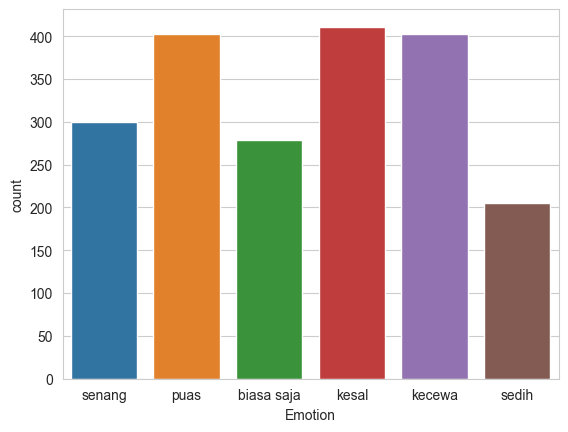

In [12]:
# Missing values in the dataset
print(f"Number of null in label: { df['Emotion'].isnull().sum() }")
print(f"Number of null in text: { df['Text'].isnull().sum()}")
sns.countplot(x='Emotion', data=df);

# **Visualizing Word Clouds**

In [13]:
from wordcloud import WordCloud

In [14]:
df_negative = df[ (df['Emotion']=='kesal') | (df['Emotion']=='sedih') | (df['Emotion']=='kecewa')]
df_positive = df[ (df['Emotion']=='senang') | (df['Emotion']=='Puas') | (df['Emotion']=='biasa saja')]
#convert to list
negative_list=df_negative['lemmatized_review'].tolist()
positive_list= df_positive['lemmatized_review'].tolist()

filtered_negative = ("").join(str(negative_list)) #convert the list into a string of spam
filtered_negative = filtered_negative.lower()

filtered_positive = ("").join(str(positive_list)) #convert the list into a string of ham
filtered_positive = filtered_positive.lower()

<h3><b>Word Cloud</b>: Positive Reviews</h3>

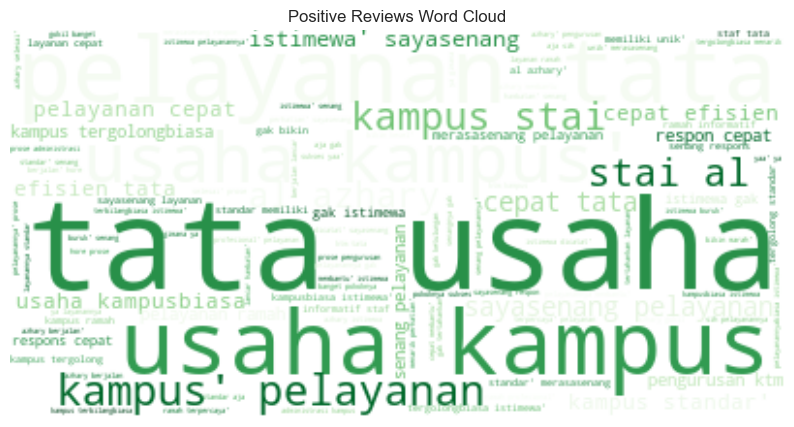

In [15]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Greens").generate(filtered_positive)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Positive Reviews Word Cloud")
plt.show()

<h3><b>Word Cloud</b>: Negative Reviews</h3>

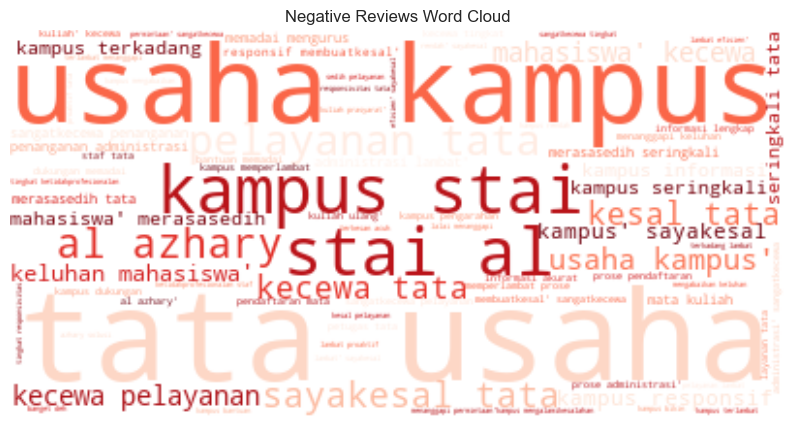

In [16]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_negative)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negative Reviews Word Cloud")
plt.show()

# **Feature Extraction from Text**

*   Vectorizer : TF-IDF

In [17]:
X = df[['lemmatized_review', 'Review_len', 'punct']]
y = df['label']
print(X.shape)
print(y.shape)

(2001, 3)
(2001,)


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1400, 3)
(601, 3)
(1400,)
(601,)


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df = 0.5, min_df = 2) # ignore terms that occur in more than 50% documents and the ones that occur in less than 2
tfidf_train = tfidf.fit_transform(X_train['lemmatized_review'])
tfidf_test = tfidf.transform(X_test['lemmatized_review'])

X_train_vect = pd.concat([X_train[['Review_len', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['Review_len', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()  

,Review_len,punct,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293
0,37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.66569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.746228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.244149,0.0,0.244149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.581917,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.285080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.613001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.159705,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.244149,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.405176,0.0,0.405176,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

# **Visualize Confusion Matrix**
*   Vectorizer : TF-IDF

In [20]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

<h3><u>Algoritma</u> : Multinomial Naive Bayes</h3>

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       319
           1       1.00      0.98      0.99       282

    accuracy                           0.99       601
   macro avg       0.99      0.99      0.99       601
weighted avg       0.99      0.99      0.99       601



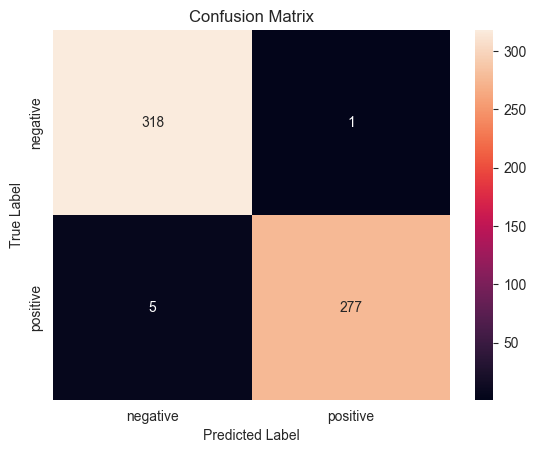

In [21]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train_vect, y_train)
naive_bayes_pred = classifier.predict(X_test_vect)

# Classification Report
print(classification_report(y_test, naive_bayes_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, naive_bayes_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

<h3><u>Algoritma</u>: Random Forest Classifier</h3>

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       319
           1       1.00      1.00      1.00       282

    accuracy                           1.00       601
   macro avg       1.00      1.00      1.00       601
weighted avg       1.00      1.00      1.00       601



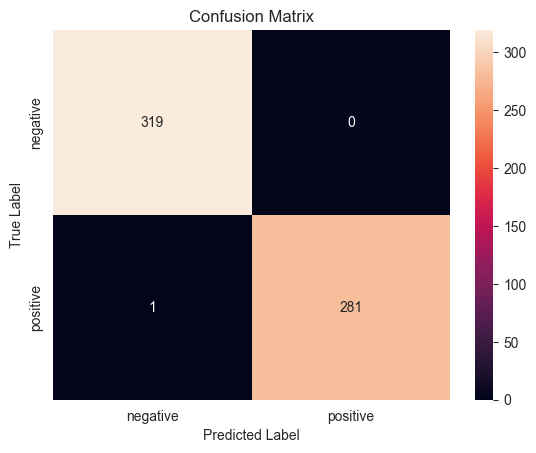

In [22]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=150)
classifier.fit(X_train_vect, y_train)
random_forest_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, random_forest_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, random_forest_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

<h3><u>Algoritma</u>: Logistic Regression</h3>

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       319
           1       0.99      1.00      0.99       282

    accuracy                           1.00       601
   macro avg       0.99      1.00      0.99       601
weighted avg       1.00      1.00      1.00       601



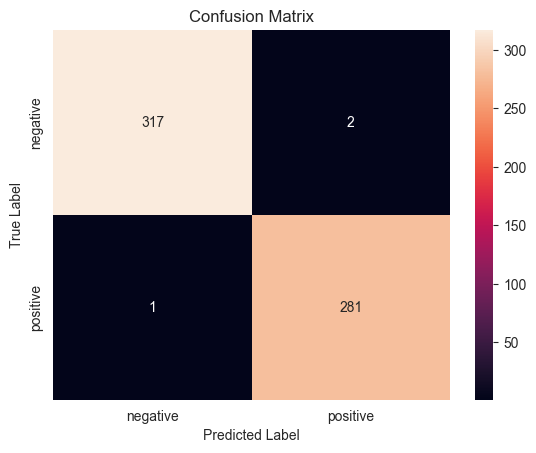

In [23]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_vect, y_train)
log_reg_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, log_reg_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, log_reg_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

<h3><u>Algoritma</u>: Support Vector Machine (SVM)</h3>

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       319
           1       1.00      1.00      1.00       282

    accuracy                           1.00       601
   macro avg       1.00      1.00      1.00       601
weighted avg       1.00      1.00      1.00       601



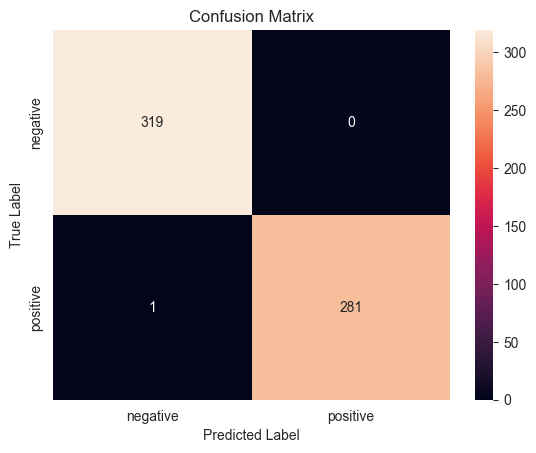

In [24]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_vect, y_train)
svm_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, svm_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, svm_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

<h3><u>Algoritma</u>: K-Nearest Neighbor (KNN)</h3>

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       319
           1       0.91      0.92      0.91       282

    accuracy                           0.92       601
   macro avg       0.92      0.92      0.92       601
weighted avg       0.92      0.92      0.92       601



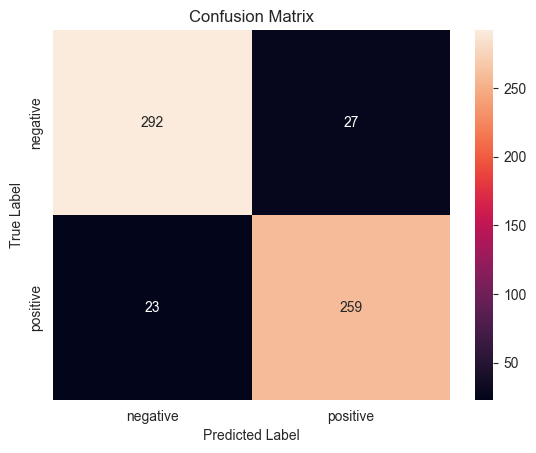

In [25]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train_vect, y_train)
knn_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, knn_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, knn_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

<h3><u>Algoritma</u>: Extra Trees Classifier</h3>

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       319
           1       1.00      1.00      1.00       282

    accuracy                           1.00       601
   macro avg       1.00      1.00      1.00       601
weighted avg       1.00      1.00      1.00       601



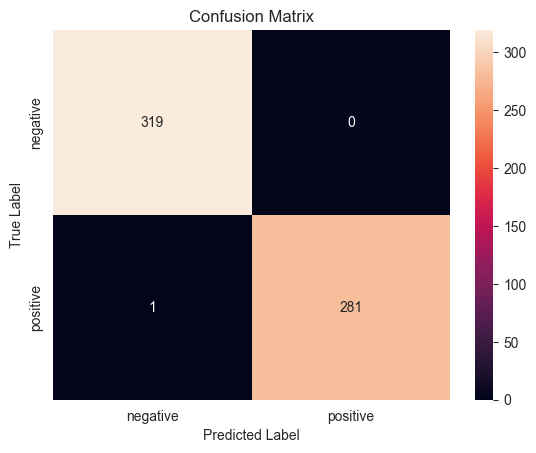

In [26]:
from sklearn.ensemble import ExtraTreesClassifier
classifier = ExtraTreesClassifier(n_estimators=150, random_state=50)
classifier.fit(X_train_vect, y_train)
extra_trees_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, extra_trees_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, extra_trees_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# **Performing K-Fold Cross Validation**

In [27]:
from sklearn.model_selection import cross_val_score

models = [
          MultinomialNB(),
          LogisticRegression(),
          RandomForestClassifier(n_estimators = 150),
          SVC(kernel = 'linear'),
          KNeighborsClassifier(n_neighbors = 5),
          ExtraTreesClassifier(n_estimators=150, random_state=50)
         ]
names = ["Naive Bayes", "Logistic Regression", "Random Forest", "SVM", "KNN", "Extra Trees"]
for model, name in zip(models, names):
    print(name)
    for score in ["accuracy", "precision", "recall", "f1"]:
        print(f" {score} - {cross_val_score(model, X_train_vect, y_train, scoring=score, cv=10).mean()} ")
    print()

Naive Bayes
 accuracy - 0.9807142857142856 
 precision - 0.9869924460813564 
 recall - 0.9742857142857144 
 f1 - 0.980468931909926 

Logistic Regression
 accuracy - 0.985 
 precision - 0.9871393321566228 
 recall - 0.9828571428571429 
 f1 - 0.9849220346202223 

Random Forest
 accuracy - 0.9957142857142858 
 precision - 0.9943253725250051 
 recall - 0.9971428571428571 
 f1 - 0.9957242716465127 

SVM
 accuracy - 0.9949999999999999 
 precision - 0.9943661971830984 
 recall - 0.9957142857142858 
 f1 - 0.9950150517883566 

KNN
 accuracy - 0.9207142857142856 
 precision - 0.9303682613108254 
 recall - 0.9099999999999999 
 f1 - 0.9192191655134829 

Extra Trees
 accuracy - 0.9957142857142859 
 precision - 0.9929577464788732 
 recall - 0.9985714285714286 
 f1 - 0.9957344762487882 



# **Predictions**


*   <u>Vectorizer</u> : CountVectorizer (Bag of words)
*   <u>Algoritma</u>  : Multinomial Naive Bayes

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_cv = cv.fit_transform(df['lemmatized_review']) # Fit the Data
y_cv = df['label']

from sklearn.model_selection import train_test_split
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_cv, y_cv, test_size=0.3, random_state=42)

In [29]:
#Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

clf.fit(X_train_cv, y_train_cv)
clf.score(X_test_cv, y_test_cv)

0.9916805324459235

In [30]:
data = ["Pelayanannya sangat memuaskan", "Proses administrasinya cepat dan mudah", "Tidak ada yang istimewa dari pelayanannya.", "Pelayanannya sangat lambat dan tidak responsif.","Kualitas layanan menurun drastis.","Saya merasasedih dengan pelayanannya."]
vect = cv.transform(data).toarray()

my_prediction = clf.predict(vect)
print(my_prediction)

[1 1 1 0 0 0]








---

*   <u>Vectorizer</u>: TF-IDF
*   <u>Algoritma</u>: Extra Trees Classifier

In [31]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 10)
# from sklearn.ensemble import ExtraTreesClassifier
# classifier = ExtraTreesClassifier(n_estimators=150, random_state=50)

classifier.fit(tfidf_train, y_train)
classifier.score(tfidf_test, y_test)

0.9966722129783694

In [32]:
data = ["Pelayanannya sangat memuaskan", "Proses administrasinya cepat dan mudah", "Tidak ada yang istimewa dari pelayanannya.", "Pelayanannya sangat lambat dan tidak responsif.","Kualitas layanan menurun drastis.","Saya merasasedih dengan pelayanannya."]
vect = tfidf.transform(data).toarray()

my_pred = classifier.predict(vect)
print(my_pred)

[1 1 1 0 0 0]


In [39]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import joblib

# Assuming you have your data in tfidf_train and y_train

# Step 4: Train the SVM model
classifier = SVC(kernel='linear', random_state=10)
classifier.fit(tfidf_train, y_train)

# Step 5: Evaluate the model
accuracy = classifier.score(tfidf_test, y_test)
print("Accuracy:", accuracy)

# Save the trained model to a file
joblib.dump(classifier, 'svm_model.pkl')

# Save the TF-IDF vectorizer to a file
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')


Accuracy: 0.9966722129783694


['tfidf_vectorizer.pkl']